In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learning-equality-curriculum-recommendations/sample_submission.csv
/kaggle/input/learning-equality-curriculum-recommendations/topics.csv
/kaggle/input/learning-equality-curriculum-recommendations/correlations.csv
/kaggle/input/learning-equality-curriculum-recommendations/content.csv


# Learning Equality Curriculum Recommendations

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = '/kaggle/input/learning-equality-curriculum-recommendations/'
   

In [4]:
content = pd.read_csv(path +'content.csv')
corr = pd.read_csv(path +'correlations.csv')
topics = pd.read_csv(path +'topics.csv')
sub = pd.read_csv(path +'sample_submission.csv')

# **Explore Topic dataset**

In [5]:
topics.shape

(76972, 9)

In [6]:
topics.head()

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


In [7]:
topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76972 entries, 0 to 76971
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           76972 non-null  object
 1   title        76970 non-null  object
 2   description  34953 non-null  object
 3   channel      76972 non-null  object
 4   category     76972 non-null  object
 5   level        76972 non-null  int64 
 6   language     76972 non-null  object
 7   parent       76801 non-null  object
 8   has_content  76972 non-null  bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 4.8+ MB


In [8]:
topics.isna().sum()

id                 0
title              2
description    42019
channel            0
category           0
level              0
language           0
parent           171
has_content        0
dtype: int64

In [9]:
len(topics['id'].unique())

76972

In [10]:
topics["description"].fillna("No Description", inplace = True)

In [11]:
topics["title"].fillna("No Title", inplace = True)

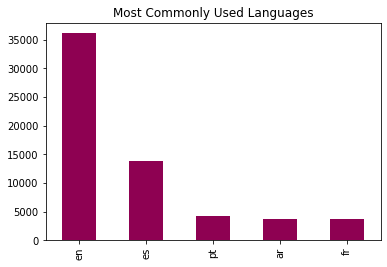

In [12]:
topics['language'].value_counts(ascending = False).head(5).plot(kind='bar',cmap="PiYG")

plt.title('Most Commonly Used Languages')
plt.show()

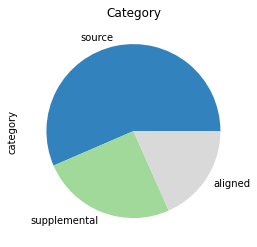

In [13]:
topics['category'].value_counts().head(5).plot(kind='pie',cmap="tab20c")

plt.title('Category')
plt.show()

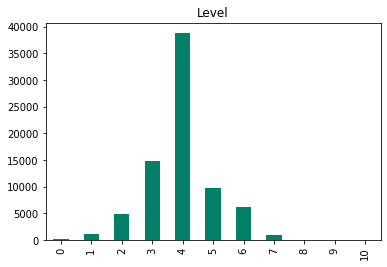

In [14]:
topics['level'].value_counts().sort_index().plot(kind='bar',cmap="summer")

plt.title('Level')
plt.show()

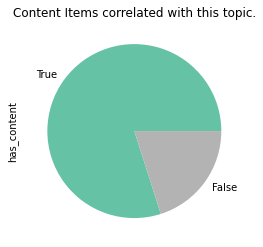

In [15]:
topics['has_content'].value_counts().head(5).plot(kind='pie',cmap="Set2")

plt.title('Content Items correlated with this topic.')
plt.show()

In [16]:
topics["has_content"] = topics["has_content"].map({True:1, False:0})

In [17]:
topics['has_content'].value_counts()

1    61517
0    15455
Name: has_content, dtype: int64

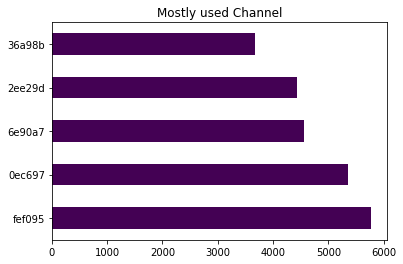

In [18]:
topics['channel'].value_counts(ascending = False).head(5).plot(kind='barh',cmap="viridis")

plt.title('Mostly used Channel')
plt.show()

# **Explore Content Dataset**

In [19]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154047 entries, 0 to 154046
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                154047 non-null  object
 1   title             154038 non-null  object
 2   description       89456 non-null   object
 3   kind              154047 non-null  object
 4   text              74035 non-null   object
 5   language          154047 non-null  object
 6   copyright_holder  71821 non-null   object
 7   license           74035 non-null   object
dtypes: object(8)
memory usage: 9.4+ MB


In [20]:
content.isna().sum()

id                      0
title                   9
description         64591
kind                    0
text                80012
language                0
copyright_holder    82226
license             80012
dtype: int64

In [21]:
content["description"].fillna("No Description", inplace = True)

In [22]:
content["text"].fillna("Not Available", inplace = True)

In [23]:
len(content['id'].unique())

154047

In [24]:
content["license"].fillna("Not Available", inplace = True)

In [25]:
content["title"].fillna("Not Available", inplace = True)

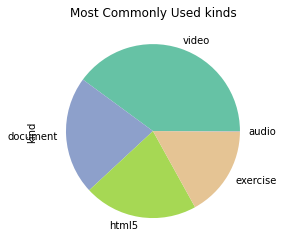

In [26]:
content['kind'].value_counts().head(5).plot(kind='pie',cmap="Set2")

plt.title('Most Commonly Used kinds')
plt.show()

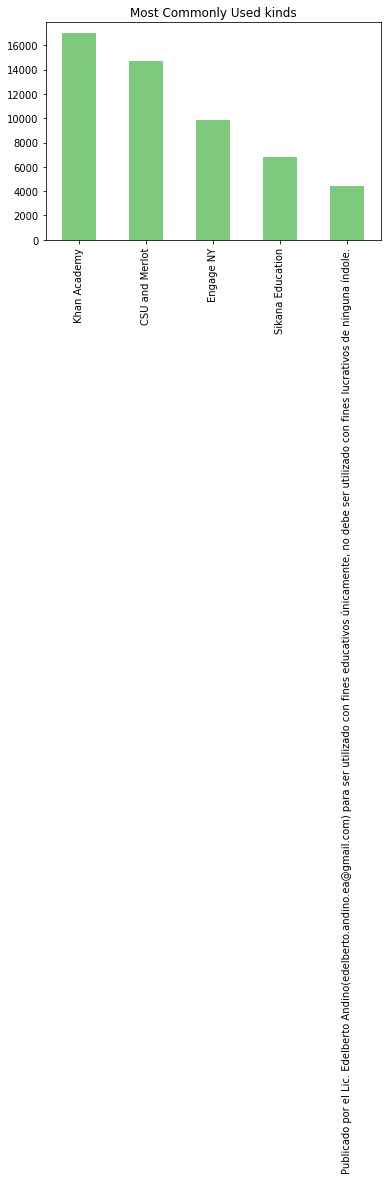

In [27]:
content['copyright_holder'].value_counts().head(5).plot(kind='bar',cmap="Accent")

plt.title('Most Commonly Used kinds')
plt.show()

In [28]:
corr.head()

,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4


In [29]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61517 entries, 0 to 61516
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   topic_id     61517 non-null  object
 1   content_ids  61517 non-null  object
dtypes: object(2)
memory usage: 961.3+ KB


In [30]:
topics.rename(columns = {'id':'topic_id'}, inplace = True)

# **Merge the datasets**

In [31]:
final_df1 = corr.merge(topics, on='topic_id', how='left')

print('Final_df shape:', final_df1.shape)

Final_df shape: (61517, 10)


In [32]:
final_df1.head()

,topic_id,content_ids,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,1
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,1
2,t_00069b63a70a,c_11a1dc0bfb99,Transcripts,No Description,6e3ba4,source,3,en,t_4054df11a74e,1
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,1
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4,100 સુધીનો સરવાળો,37 અને 49 જેવી બે-અંકની સંખ્યાઓ ઉમેરતા શીખો.,5223e0,supplemental,4,gu,t_0da7a331d666,1


In [33]:
content.rename(columns = {'id':'content_ids'}, inplace = True)

In [34]:
final_df = final_df1.merge(content, on='content_ids', how='left')

print('Final_df shape:', final_df.shape)

Final_df shape: (61517, 17)


In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61517 entries, 0 to 61516
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   topic_id          61517 non-null  object
 1   content_ids       61517 non-null  object
 2   title_x           61517 non-null  object
 3   description_x     61517 non-null  object
 4   channel           61517 non-null  object
 5   category          61517 non-null  object
 6   level             61517 non-null  int64 
 7   language_x        61517 non-null  object
 8   parent            61507 non-null  object
 9   has_content       61517 non-null  int64 
 10  title_y           13437 non-null  object
 11  description_y     13437 non-null  object
 12  kind              13437 non-null  object
 13  text              13437 non-null  object
 14  language_y        13437 non-null  object
 15  copyright_holder  5962 non-null   object
 16  license           13437 non-null  object
dtypes: int64(2),

In [36]:
final_df.head()

,topic_id,content_ids,title_x,description_x,channel,category,level,language_x,parent,has_content,title_y,description_y,kind,text,language_y,copyright_holder,license
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,t_00069b63a70a,c_11a1dc0bfb99,Transcripts,No Description,6e3ba4,source,3,en,t_4054df11a74e,1,Flow Charts: Logical..: Written Transcript of ...,"Written Transcript of this video lesson, Engli...",document,Español\t\n \nTítulo\t\n de\t\n la\t\n lec...,en,MIT Blossoms,CC BY-NC-SA
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4,100 સુધીનો સરવાળો,37 અને 49 જેવી બે-અંકની સંખ્યાઓ ઉમેરતા શીખો.,5223e0,supplemental,4,gu,t_0da7a331d666,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Models**

In [37]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Reshape, Dot, Flatten, concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG

In [38]:
# Notes: Reshape(n_dim, ) is same with Flatten, we can use both (choose one)

def RecommenderV1(n_topics, n_content, n_dim):
    
    # User
    topics = Input(shape=(1,))
    U = Embedding(n_topics, n_dim)(topics)
    U = Flatten()(U)
    
    # Movie
    content = Input(shape=(1,))
    M = Embedding(n_content, n_dim)(content)
    M = Flatten()(M)
    
    # Dot U and M
    x = Dot(axes=1)([U, M])
    
    model = Model(inputs=[topics, content], outputs=x)
    
    model.compile(optimizer=Adam(0.0001),
                  loss='mean_squared_error')
    
    return model

In [39]:
topics_nunique = final_df['topic_id'].nunique()
content_nunique = final_df['content_ids'].nunique()

print('User_id total unique:', topics_nunique)
print('Movieid total unique:', content_nunique)

User_id total unique: 61517
Movieid total unique: 47299


In [40]:
model1 = RecommenderV1(topics_nunique, content_nunique, 100)

2023-01-18 06:22:11.400463: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


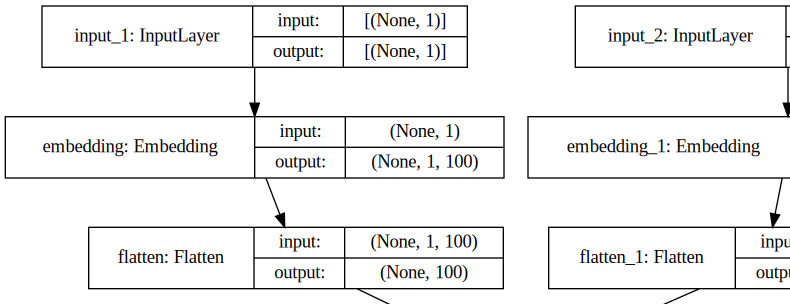

In [41]:
SVG(model_to_dot(model1,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [42]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       6151700     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       4729900     input_2[0][0]                    
______________________________________________________________________________________________

In [43]:
checkpoint1 = ModelCheckpoint('model1.h5', monitor='val_loss', verbose=0, save_best_only=True)

In [44]:
final_df["corr"] = final_df[["title_x", "title_y"]].values.tolist()
train_df = pd.DataFrame(final_df["corr"])

In [45]:
!pip -qqq install sentence-transformers

In [46]:
from datasets import Dataset
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from sentence_transformers import SentenceTransformer, models, InputExample, losses

In [47]:
df = Dataset.from_pandas(train_df)

In [48]:
df

Dataset({
    features: ['corr', '__index_level_0__'],
    num_rows: 61517
})

In [49]:
train_set = []
train_data = df["corr"]
n_set = df.num_rows

for i in range(n_set):
    trial = train_data[i]
    if trial[0] == None:
        print(trial)
        continue        
    train_set.append(InputExample(texts=[str(trial[0]), str(trial[1])]))

In [50]:
model2 = SentenceTransformer("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/723 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/402 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [51]:
train_dl = DataLoader(train_set, shuffle=True, batch_size=64)
train_loss = losses.MultipleNegativesRankingLoss(model=model2)

num_epochs = 1
warmup_steps = int(len(train_dl) * num_epochs * 0.1)

In [52]:
model2.fit(train_objectives=[(train_dl, train_loss)],
          epochs=num_epochs,
          warmup_steps=warmup_steps)\

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/962 [00:00<?, ?it/s]